<p style="padding:10px;
    background-color:black;
    color:white;
    font-family:computermodern;
    font-size:240%;
    text-align:center;
    border-radius:20px 20px">Sowing Success: How Machine Learning Helps Farmers Select the Best Crops</p>

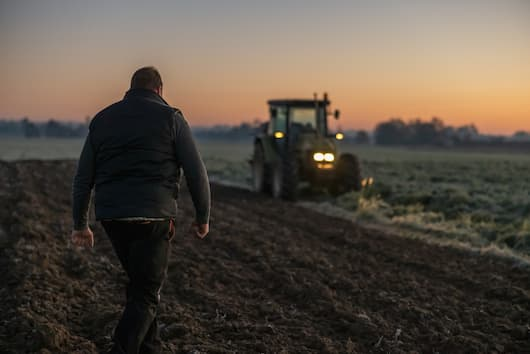

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called soil_measures.csv, which contains:


- `N`: Nitrogen content ratio in the soil
- `P`: Phosphorous content ratio in the soil
- `K`: Potassium content ratio in the soil
- `pH` value of the soil
- `crop`: categorical values that contain various crops (target variable).
- 
Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `crop` column is the optimal choice for that field.

In this project, you will build multi-class classification models to predict the type of `crop` and identify the single most importance feature for predictive performance.


<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">Importing Libraries</p>

In [5]:
# Import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for statistical data visualization

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression # import LogisticRegression classifier
from sklearn.neighbors import KNeighborsClassifier # import KNeighbors classifier
from sklearn.svm import SVC # import SVC classifier
from sklearn.tree import DecisionTreeClassifier # import DecisionTree classifier
# import metrics to compute accuracy
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">Loading DataSet</p>

In [8]:
# Load the dataset
data=pd.read_csv('soil_measures.csv')
data.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [10]:
# view dimensions of dataset
data.shape

(2200, 5)

In [12]:
#description of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091


In [14]:
#more information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [16]:
# Check for crop types
data['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">EDA</p>

In [19]:
#checking missing values
data.isna().sum().sort_values(ascending=True)

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [21]:
num_data_cols=[i for i in data.columns if data[i].dtypes=='int64' or data[i].dtypes=='float64']
num_data_cols

['N', 'P', 'K', 'ph']

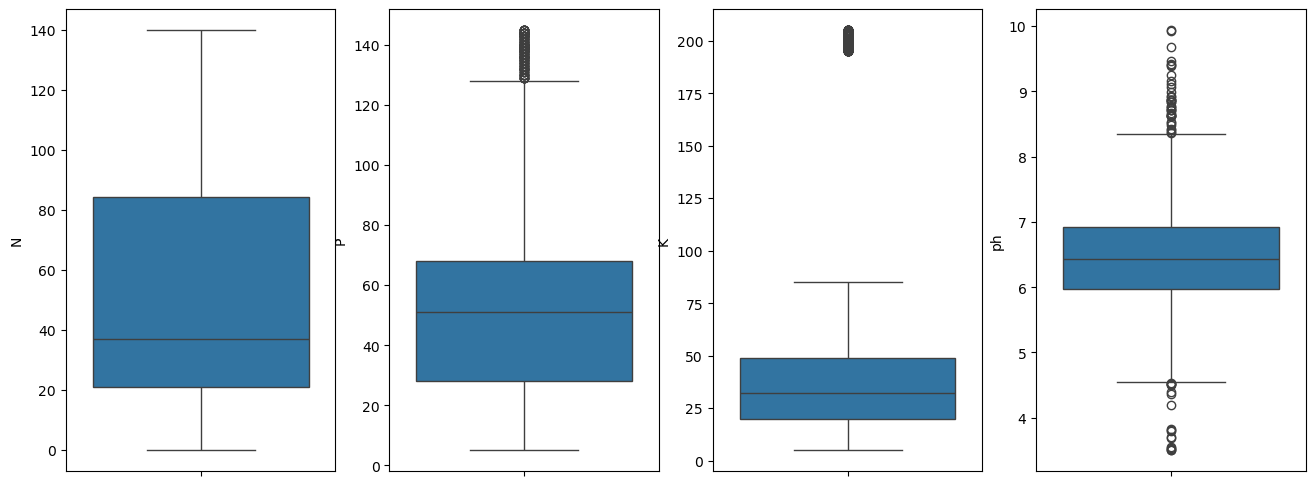

In [23]:
fig,axs=plt.subplots(nrows=1, ncols=4, figsize=(16,6))
index=0

#Outliers
axs=axs.flatten()
for k,v in data[num_data_cols].items():
    sns.boxplot(data=data, y=k, ax=axs[index])
    index+=1
plt.show()

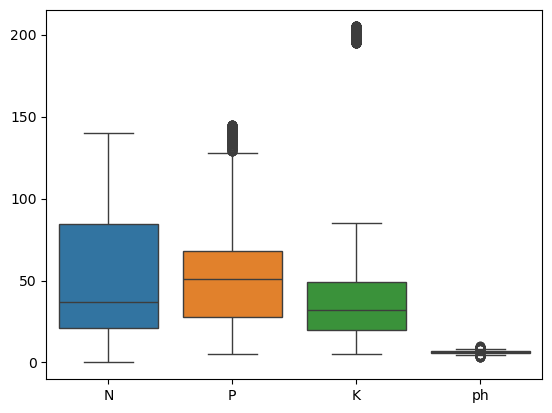

In [25]:
sns.boxplot(data=data[num_data_cols])
plt.show()

In [27]:
#drop Outliers
data.drop(data[data['K']>150].index,axis=0,inplace=True)

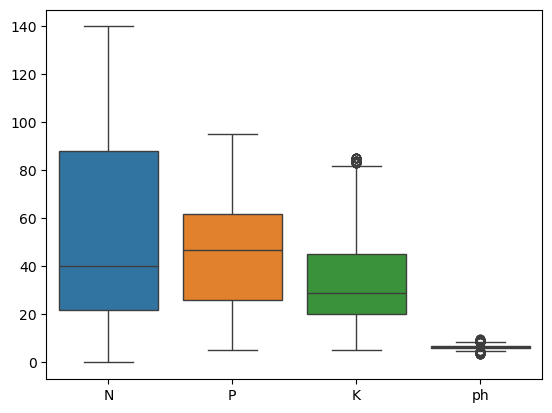

In [29]:
sns.boxplot(data=data[num_data_cols])
plt.show()

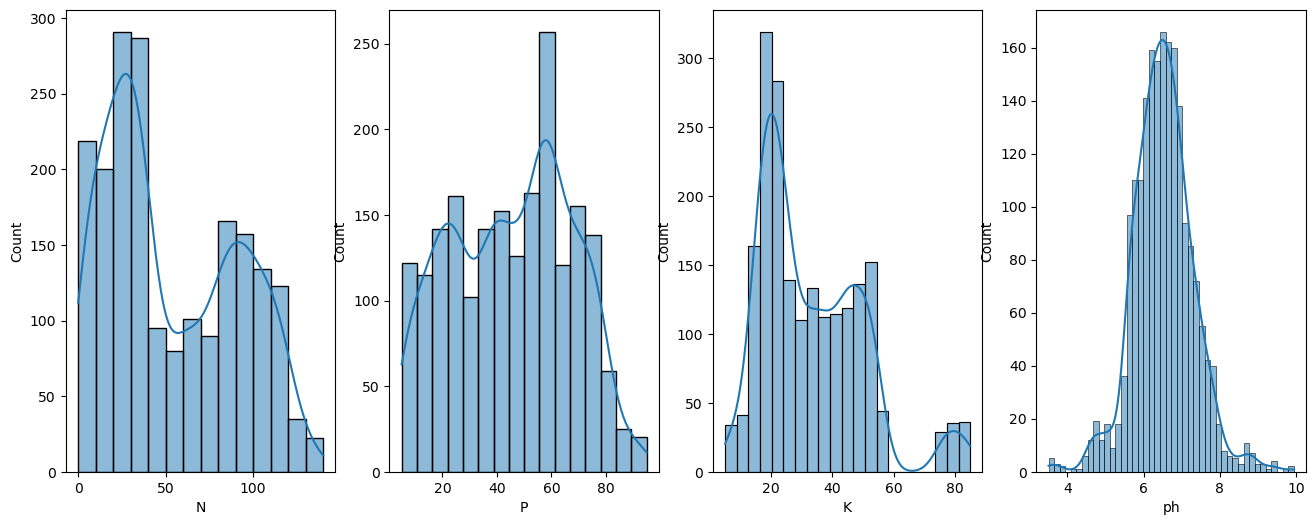

In [31]:
fig=plt.figure(figsize=(16,6))
index=1
for col,val in data[num_data_cols].items():
    plt.subplot(1,4,index)
    sns.histplot(data=data,x=col, kde=True)
    index+=1
plt.show()

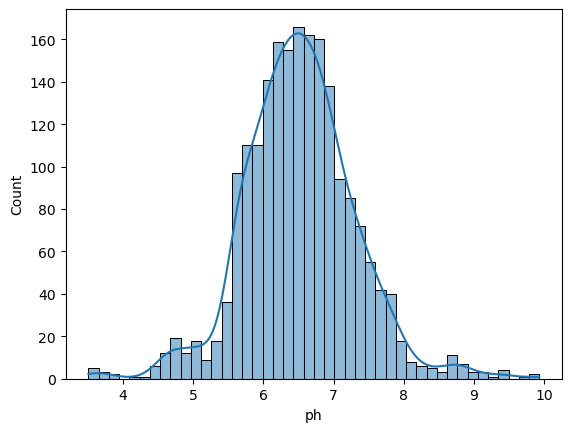

In [33]:
sns.histplot(data=data,x='ph', kde=True)
plt.show()

In [37]:
#convert categorical data into numerical data
label_encoder=LabelEncoder()
data['crop']=label_encoder.fit_transform(data['crop'])
classes=label_encoder.classes_
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">Splitting DataSet</p>

In [92]:
X=data.drop('crop',axis=1)
Y=data.iloc[:,-1]

X_train, X_test, y_train, y_test=train_test_split(X,Y, train_size=0.8, random_state=42)

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">LogisticRegression Model</p>

In [95]:
#Data Scaling
SC=StandardScaler()
SC_X_train=SC.fit_transform(X_train)
SC_X_test=SC.transform(X_test)

In [97]:
#LogisticRegression Model
LR=LogisticRegression(multi_class='multinomial')
LR.fit(SC_X_train, y_train)

y_pred=LR.predict(SC_X_test)

In [99]:
y_pred_prob=LR.predict_proba(SC_X_test)

In [101]:
#model evaluation
print(f'model accuracy= {accuracy_score(y_test, y_pred)*100}%')
print(f'Classification Report:\n {classification_report(y_test,y_pred)}')

model accuracy= 69.75%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.58      0.61      0.59        18
           2       1.00      1.00      1.00        22
           3       0.73      0.68      0.70        28
           4       0.96      0.96      0.96        24
           5       0.95      0.90      0.92        20
           6       0.55      0.61      0.58        18
           7       0.67      0.32      0.43        25
           8       0.42      0.62      0.50        16
           9       0.90      1.00      0.95        18
          10       0.45      0.53      0.49        19
          11       0.50      0.24      0.32        25
          12       0.56      0.78      0.65        18
          13       0.53      0.53      0.53        17
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        23
          16       0.24      0.33 

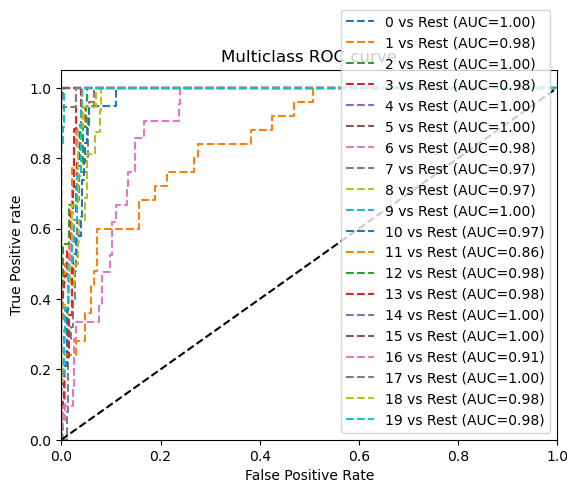

In [103]:
from sklearn.preprocessing import label_binarize
#binarize y_values
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr, tpr, threshold, roc_auc=dict(), dict(), dict(), dict()
n_class = classes.shape[0]

for itr in range(n_class):
    fpr[itr],tpr[itr],threshold[itr]=roc_curve(y_test_binarized[:,itr], y_pred_prob[:,itr])
    
    roc_auc[itr] = auc(fpr[itr], tpr[itr])
    # plotting    
    plt.plot(fpr[itr], tpr[itr], linestyle='--' , label='%s vs Rest (AUC=%0.2f)'%(classes[itr],roc_auc[itr]))
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1.05])

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">K-Fold & LogisticRegression Model</p>

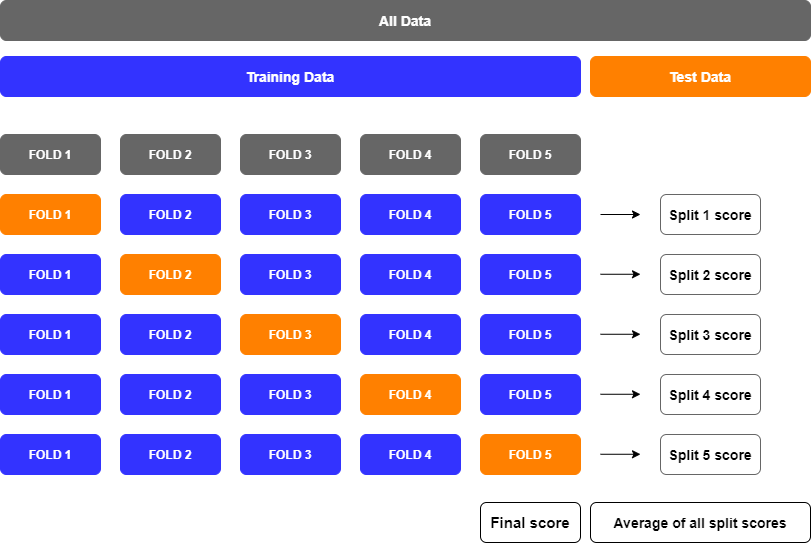

In [107]:
results={}
for i in range(5,11):
    model=LogisticRegression()
    kf=KFold(n_splits=i, random_state=42, shuffle=True)
    cv_results=cross_val_score(model,SC_X_train, y_train, cv=kf, scoring="accuracy")
    results[i]=np.mean(cv_results)    

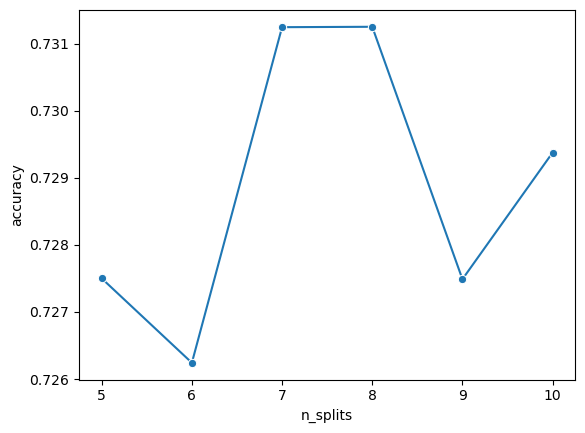

In [108]:
sns.lineplot(x=results.keys(),y=results.values(),marker='o')
plt.xlabel('n_splits')
plt.ylabel('accuracy')
plt.show()

We will get the heighest accuracy if we used n_splits=7

In [112]:
kf=KFold(n_splits=7, random_state=42, shuffle=True)
cv_results=cross_val_score(LR,SC_X_train, y_train, cv=kf, scoring="accuracy")

In [114]:
print(f'accuracy= {np.mean(cv_results)*100 : 0.2f}%')

accuracy=  73.12%


<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">DecisionTree Model</p>

In [117]:
DT=DecisionTreeClassifier(random_state=42)

DT.fit(SC_X_train,y_train)
DT_predictions=DT.predict(SC_X_test)
DT_y_pred_prob=DT.predict_proba(SC_X_test)

In [119]:
#model evaluation
print(f'model accuracy= {accuracy_score(y_test, DT_predictions)*100}%')
print(f'Classification Report:\n {classification_report(y_test,DT_predictions)}')

model accuracy= 77.5%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.81      0.72      0.76        18
           2       1.00      1.00      1.00        22
           3       0.78      0.64      0.71        28
           4       1.00      0.96      0.98        24
           5       0.95      1.00      0.98        20
           6       0.56      0.78      0.65        18
           7       0.85      0.68      0.76        25
           8       0.37      0.62      0.47        16
           9       0.94      0.94      0.94        18
          10       0.59      0.68      0.63        19
          11       0.80      0.80      0.80        25
          12       0.89      0.89      0.89        18
          13       0.53      0.47      0.50        17
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        23
          16       0.37      0.33  

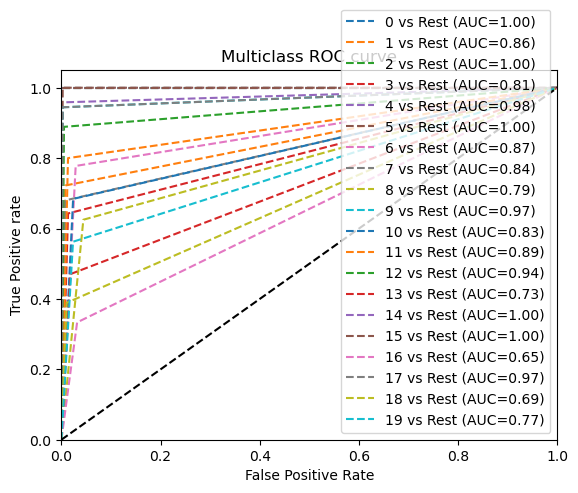

In [121]:
from sklearn.preprocessing import label_binarize
#binarize y_values
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr, tpr, threshold, roc_auc=dict(), dict(), dict(), dict()
n_class = classes.shape[0]

for itr in range(n_class):
    fpr[itr],tpr[itr],threshold[itr]=roc_curve(y_test_binarized[:,itr], DT_y_pred_prob[:,itr])
    
    roc_auc[itr] = auc(fpr[itr], tpr[itr])
    # plotting    
    plt.plot(fpr[itr], tpr[itr], linestyle='--' , label='%s vs Rest (AUC=%0.2f)'%(classes[itr],roc_auc[itr]))
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1.05])

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [123]:
#KFold Splitting
results={}
for i in range(5,11):
    model=DecisionTreeClassifier()
    kf=KFold(n_splits=i, random_state=42, shuffle=True)
    cv_results=cross_val_score(model,SC_X_train, y_train, cv=kf, scoring="accuracy")
    results[i]=np.mean(cv_results)   

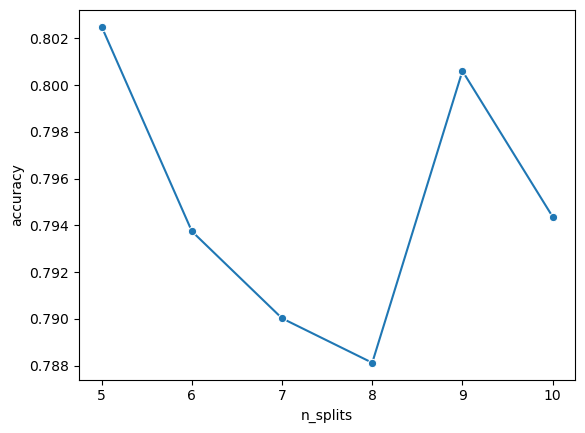

In [125]:
sns.lineplot(x=results.keys(),y=results.values(),marker='o')
plt.xlabel('n_splits')
plt.ylabel('accuracy')
plt.show()

We will get the heighest accuracy if we used n_splits=5

In [146]:
kf=KFold(n_splits=5, random_state=42, shuffle=True)
cv_results=cross_val_score(DT,SC_X_train, y_train, cv=kf, scoring="accuracy")

In [148]:
print(f'accuracy= {np.mean(cv_results)*100 : 0.2f}%')

accuracy=  79.88%


In [ ]:
from sklearn.tree import plot_tree
r=plot_tree(DT)

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">SVC Model</p>

In [ ]:
svc=SVC(kernel='linear')
svc.fit(SC_X_train, y_train)
svm_predictions=svc.predict(SC_X_test)

In [ ]:
#model evaluation
print(f'model accuracy= {accuracy_score(y_test, svm_predictions)*100}%')
print(f'Classification Report:\n {classification_report(y_test,svm_predictions)}')